In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

Let's start by opening the h5 file that contains our data

In [3]:
datadir = '/data2/cbernet/maldives/yelp_dataset'
h5 = h5py.File(datadir+'/data.h5')
d = h5['reviews']
d.shape

(6685900, 254)

The data is as expected: 6685900 reviews, and for each of them, 254 values: 

* rating
* useful
* funny
* cool 
* 250 encoded words. 

We can have a look at the first entry. It is a positive one (5 stars in the first column) and one person found it useful. The review text is relatively short, and followed by the padding zero values. 

In [5]:
print(d[0])

[    5     1     0     0   696    26    39  3348    26  1523    44   336
    64    14   153  5179  2731    24    72   172  4377   125   257  3044
  6568 10127  8410     3    33   277   219   501  8900     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

To decode this review, we are going to use our Vocabulary class. 

In [6]:
from vocabulary import Vocabulary
vocab = Vocabulary.load(datadir+'/index')
rev1 = d[0,1:]
rev1 = rev1[rev1!=0]
' '.join(vocab.decode(rev1))

'<UNK> helped out when locked out apartment he quick got at price lowest comparison all other area definately recommend top master situations requiring locksmith they get job done quickly effectively'

For what we want to do next, we load the whole dataset in memory, it's going to be faster:

In [7]:
d = d[:]

Let's plot the distribution of words in the reviews:

(array([  1038.,    415.,    456.,    625.,   1137.,   2068.,   3768.,
          5886.,   8594.,  12730.,  19735.,  30048.,  42499.,  54013.,
         63519.,  70318.,  74705.,  77849.,  79844.,  81107.,  81612.,
         82581.,  82443.,  82885.,  82453.,  82032.,  82324.,  81949.,
         81981.,  81408.,  80603.,  79998.,  79513.,  78804.,  77777.,
         76974.,  75738.,  74805.,  73592.,  72527.,  71994.,  70476.,
         69457.,  68392.,  66827.,  66237.,  65352.,  64467.,  62895.,
         61749.,  60725.,  59826.,  58271.,  57917.,  56793.,  55611.,
         54894.,  53596.,  52253.,  51849.,  51048.,  50133.,  48632.,
         48151.,  47504.,  46591.,  46093.,  44636.,  43862.,  42710.,
         42689.,  41939.,  40610.,  40458.,  39455.,  39004.,  38255.,
         37477.,  36934.,  36216.,  35728.,  35163.,  34285.,  33633.,
         33390.,  32716.,  32117.,  31657.,  31086.,  30433.,  30156.,
         29392.,  29081.,  28753.,  27958.,  28091.,  27242.,  26758.,
      

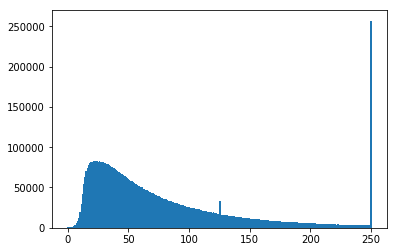

In [10]:
plt.hist(np.count_nonzero(d[:,4:], axis=1), range=(-0.5, 250.5), bins=250)

Since we have truncated our reviews at a maximum length of 250, all reviews which had more words end up in the last bin. 

Now let's plot the rating distribution:

(array([1002159.,  542394.,  739280., 1468985., 2933082.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

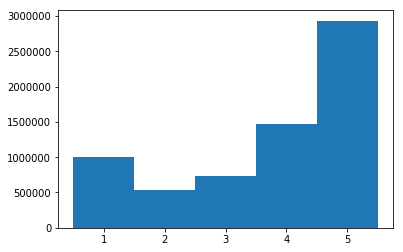

In [11]:
plt.hist(d[:,0], range=(0.5,5.5), bins=5)